In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
#import matplotlib.pyplot as mlab
from scipy.optimize import leastsq
import datetime
%matplotlib inline

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Pre-process file
#filename = 'ArgonValidation_nt_B4_g.csv'
#filename = '10cm_1e6_400GeV_RbAwake10minus7_cut1_5mm_nt_B4_g_processed.csv'
to=datetime.datetime.now()
filename = '10cm_1e6_400GeV_Rb10minus7_beam_cut1_5mm_nt_B4_g.csv'
t0 = datetime.datetime.now()
columns_new2 =['trackId','parentId','volumeName','particleName','stepNumber',
                                               'posX','posY','posZ','perp','kineeticEnergyDiff',
                                               'edepStep','kineticEnergyPostStep','processName',
                                'mompreX','mompreY','mompreZ','momposX','momposY','momposZ',
              'stepLength'] 
df = pd.read_csv('/Volumes/UNTITLED/beam/'+filename,
                 skiprows=24,header=None,
                 names=columns_new2)
print 'elapsed: '+str(datetime.datetime.now()-t0)
"""
count1=0
list1=[]
print 'reading: elapsed '+str(datetime.datetime.now()-t0)
t0 = datetime.datetime.now()
for i in range(df.shape[0]):
    
    #if i%1000==0:
    #    print 'i= ' + str(i)
    if df.iloc[i]['processName']=='event':
        count1 +=1
    else:
        list1.append(count1)    

print 'processing: elapsed '+str(datetime.datetime.now()-t0)
"""

elapsed: 0:01:03.886545


"\ncount1=0\nlist1=[]\nprint 'reading: elapsed '+str(datetime.datetime.now()-t0)\nt0 = datetime.datetime.now()\nfor i in range(df.shape[0]):\n    \n    #if i%1000==0:\n    #    print 'i= ' + str(i)\n    if df.iloc[i]['processName']=='event':\n        count1 +=1\n    else:\n        list1.append(count1)    \n\nprint 'processing: elapsed '+str(datetime.datetime.now()-t0)\n"

In [ ]:
print filename
print df.shape#, len(df.ParticleId.unique())
print df.head()

In [ ]:
"""
NOT NECESSARY BECAUSE OF PRE-PROCESSING BEFORE
#reading data frame
#filename = 'testem8_nt_B4_g.csv'
#filename = 'B4_nt_B4_g_origin_processed.csv'
filename = 'ArgonValidation_nt_B4_g.csv'
#filename = 'argon_400geV_ntp.csv'
#df = pd.read_csv('/Users/gabrielfior/OneDrive/Master Thesis/Share_Ubuntu/'+filename,
#                 skiprows=7,header=None,names=['energyDeposited_ev','fClusters','whatever'])
df = pd.read_csv('/Volumes/UNTITLED/'+filename,
                 skiprows=19,header=None,names=['trackId','parentId','volumeName','particleName','stepNumber',
                                               'posX','posY','posZ','perp','stepLength','kineeticEnergyDiff',
                                               'edepStep','kineticEnergyPostStep','processName','fCluster',
                                                'particleId'])
sf = graphlab.SFrame.read_csv('/Volumes/UNTITLED/'+filename,)    
#argon_400geV_ntp.csv
"""

In [ ]:
#df.head()

In [4]:
#df.head(40)

#df_events=df[df.processName=='event']
df_steps_p = df[(df.particleName=='proton')]
df_steps_e = df[(df.particleName=='e-')]

#df_steps_p = df[(df.particleName=='proton')]
#df_steps_e = df[(df.particleName=='e-')]


#del (df)
#print df.shape
print np.mean(df_steps_p.edepStep)
print df_steps_p.columns
#df.energyDeposited_ev.unique()

0.0838972925319
Index([u'trackId', u'parentId', u'volumeName', u'particleName', u'stepNumber',
       u'posX', u'posY', u'posZ', u'perp', u'kineeticEnergyDiff', u'edepStep',
       u'kineticEnergyPostStep', u'processName', u'mompreX', u'mompreY',
       u'mompreZ', u'momposX', u'momposY', u'momposZ', u'stepLength'],
      dtype='object')


In [ ]:
#Group by stepNumber
"""
agg1 = {'edepStep':['sum'], 'stepNumber': ['max'], 'kineticEnergyPostStep':['min','max']}
df_grouped_p = df_steps_p.groupby('ParticleId',as_index=False,group_keys=False).agg(agg1)

electronIonPairConv = 10.0 #eV for Rb
df_grouped_p['primClusters'] = df_grouped_p.edepStep.apply(lambda x: x/electronIonPairConv)

df_grouped_p.edepStep.hist(bins=np.linspace(0,3000,100))
plt.title('Histogram - energy lost / proton / 10cm: mean(eV) = '+str(df_grouped_p.edepStep.mean()))
plt.show()
df_grouped_p.primClusters.hist(bins=np.linspace(0,300,100))
plt.title('Histogram - # of clusters, mean electrons/proton / 10cm= '+str(df_grouped_p.primClusters.mean()))
plt.show()
"""

# Plot energy lost log

In [59]:
#df_steps_p['energy_lost_per_cm'] = df_steps_p.apply(lambda x: x['kineeticEnergyDiff']/x['stepLength'],
#                                                    axis=1)
df_steps_p['energy_lost_per_cm'] = df_steps_p.edepStep*100/df_steps_p.stepLength

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


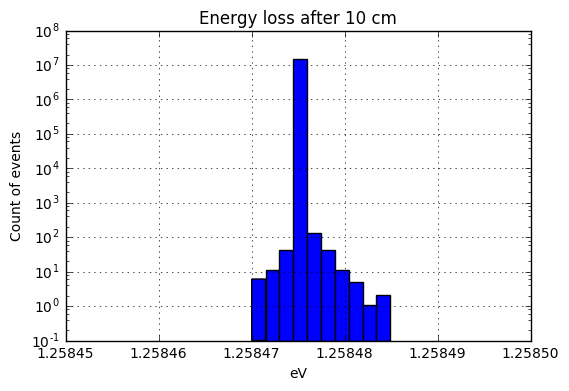

In [62]:
#series = pandas.Series(np.random.normal(size=2000))
fig, ax = plt.subplots()
df_steps_p.energy_lost_per_cm.hist(ax=ax, bins=10, bottom=0.1)
ax.set_yscale('log')
plt.xlim([1.25845,1.2585])
ax.get_xaxis().get_major_formatter().set_useOffset(False)
#plt.xlim([1.258350,1.25885])
plt.title(r'Energy loss after 10 cm')
plt.xlabel('eV')
plt.ylabel('Count of events')

In [46]:
df_steps_p.energy_lost_per_cm.describe()

count    1.500020e+07
mean     1.258475e-01
std      9.836138e-10
min      1.258470e-01
25%      1.258475e-01
50%      1.258475e-01
75%      1.258475e-01
max      1.258485e-01
Name: energy_lost_per_cm, dtype: float64